<center><h1> <b>Hand-Written Digit Classification </b></h1></center>

<h2><b>By: Sunidhi Bansal</b></h2>
<h2><b>UaceIt - Winter of Mentorship 2.0</b></h2>




In [1]:
from google.colab import drive

In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# importing pandas, numpy, matplotlib
import numpy as np
import matplotlib.pyplot as pt
import pandas as pd
from tqdm import tqdm

In [7]:
# reading the DataSet
df = pd.read_csv('/content/gdrive/MyDrive/train.csv')

In [ ]:
# To get the size of the DataSet or to get the count of rows and columns in DataSet.
df.shape

(42000, 785)

In [ ]:
# to view the first 5 rows of the DataSet
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# converting pandas dataframe to numpy arrays
data = df.values

In [ ]:
print(data)
print(type(data))

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [7 0 0 ... 0 0 0]
 [6 0 0 ... 0 0 0]
 [9 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>


In [ ]:
# cleaning the data
# pixels 
x = data[:, 1:]
print(x)

# labels  
y = data[:, 0]
print(y)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[1 0 1 ... 7 6 9]


In [ ]:
# spliting the Data into training and testing data.
split = 41000
x_train = x[:split, :]
x_test = x[split:, :]

y_train = y[:split]
y_test = y[split:]

print("Training data shape : ",x_train.shape, y_train.shape)
print("Testing data shape : ",x_test.shape, y_test.shape)

Training data shape :  (41000, 784) (41000,)
Testing data shape :  (1000, 784) (1000,)


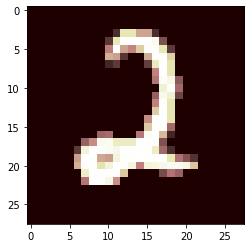

In [ ]:
# imshow function is used for displaying an image using pyplot 
# cmap : is for choosing the color. 
def show_image(sample):
  image = sample.reshape((28, 28))
  pt.imshow(image, cmap = 'pink')
  pt.show()

show_image(x_train[600])

In [ ]:
# for finding the euclidean distance
def dist(x1, x2):
  return np.sqrt(sum((x1-x2)**2))

In [ ]:
# knn-algorithm implementation
def knn(x, y, queryPoint, k=5):
    vals = []
    m = x.shape[0]
    for i in range(m):
        d = dist(queryPoint, x[i])
        vals.append((d, y[i]))
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    new_vals = np.unique(vals[:, 1], return_counts = True)
    index = new_vals[1].argmax()
    pred = new_vals[0][index]
    return pred

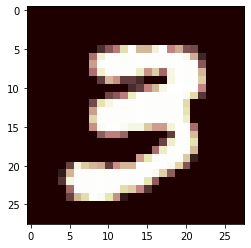

In [ ]:
show_image(x_test[14])

In [ ]:
prediction = knn(x_train, y_train, x_test[14])
print(prediction)

3.0


In [ ]:
# calculating the accurancy using sklear 
y_pred = []
m = len(x_test[:500])
for i in tqdm(range(m), total=m):
  y_pred.append(knn(x_train, y_train, x_test[i]))

print(y_pred)

100%|██████████| 500/500 [53:20<00:00,  6.40s/it]

[2.0, 8.0, 1.0, 8.0, 0.0, 1.0, 3.0, 8.0, 1.0, 0.0, 8.0, 1.0, 5.0, 7.0, 3.0, 8.0, 7.0, 6.0, 9.0, 7.0, 7.0, 5.0, 8.0, 4.0, 1.0, 6.0, 4.0, 2.0, 4.0, 9.0, 6.0, 1.0, 1.0, 2.0, 7.0, 7.0, 3.0, 6.0, 1.0, 3.0, 5.0, 0.0, 9.0, 5.0, 2.0, 9.0, 1.0, 3.0, 9.0, 4.0, 2.0, 6.0, 9.0, 3.0, 1.0, 1.0, 4.0, 2.0, 4.0, 7.0, 1.0, 8.0, 2.0, 7.0, 9.0, 6.0, 1.0, 2.0, 3.0, 0.0, 7.0, 4.0, 1.0, 6.0, 9.0, 7.0, 1.0, 4.0, 0.0, 9.0, 5.0, 6.0, 2.0, 8.0, 2.0, 0.0, 5.0, 7.0, 4.0, 2.0, 1.0, 1.0, 9.0, 8.0, 8.0, 1.0, 0.0, 0.0, 9.0, 7.0, 5.0, 2.0, 2.0, 7.0, 7.0, 7.0, 1.0, 8.0, 1.0, 6.0, 3.0, 4.0, 0.0, 9.0, 7.0, 7.0, 4.0, 0.0, 3.0, 1.0, 2.0, 0.0, 5.0, 9.0, 3.0, 6.0, 7.0, 6.0, 9.0, 0.0, 1.0, 6.0, 4.0, 3.0, 3.0, 2.0, 7.0, 6.0, 4.0, 7.0, 9.0, 9.0, 4.0, 7.0, 7.0, 1.0, 5.0, 1.0, 6.0, 6.0, 1.0, 4.0, 5.0, 9.0, 2.0, 3.0, 0.0, 3.0, 6.0, 0.0, 2.0, 1.0, 0.0, 4.0, 7.0, 0.0, 9.0, 7.0, 3.0, 0.0, 0.0, 0.0, 6.0, 5.0, 0.0, 1.0, 1.0, 2.0, 7.0, 7.0, 7.0, 7.0, 1.0, 6.0, 1.0, 9.0, 3.0, 6.0, 6.0, 8.0, 4.0, 2.0, 9.0, 1.0, 4.0, 5.0, 2.0, 4.0, 9.0, 5.0,

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_pred, y_test[:500])

In [ ]:
print(acc)

0.958


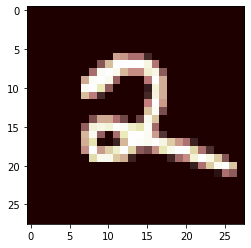

Predicted label :  2.0


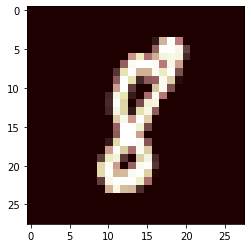

Predicted label :  8.0


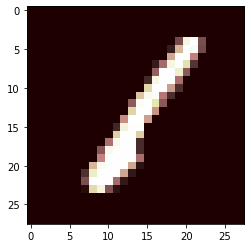

Predicted label :  1.0


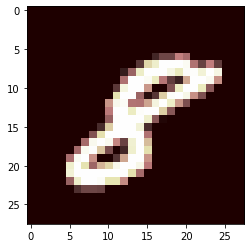

Predicted label :  8.0


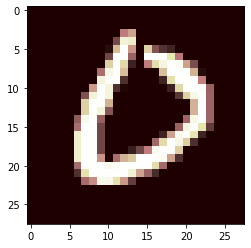

Predicted label :  0.0


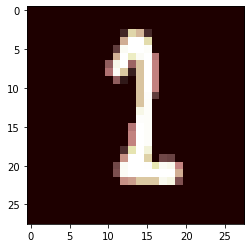

Predicted label :  1.0


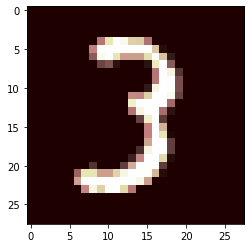

Predicted label :  3.0


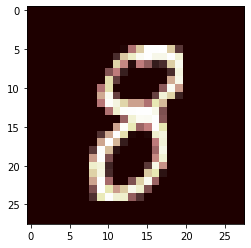

Predicted label :  8.0


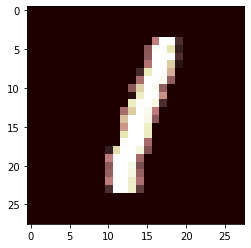

Predicted label :  1.0


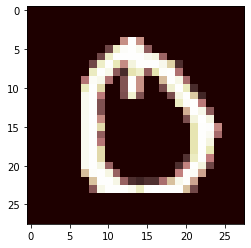

Predicted label :  0.0


In [ ]:
for i in range(10):
  labels = knn(x_train, y_train, x_test[i])
  show_image(x_test[i])
  print("Predicted label : ", labels)